## 手寫數字數據集實作
- 運算時間會比較久cpu(11分鐘)

In [ ]:
!pip install wget

In [ ]:
import wget

wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36817 (\N{CJK UNIFIED IDEOGRAPH-8FD1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37168 (\N{CJK UNIFIED IDEOGRAPH-9130}) missing from font(s) DejaVu Sans.
  fig.canvas

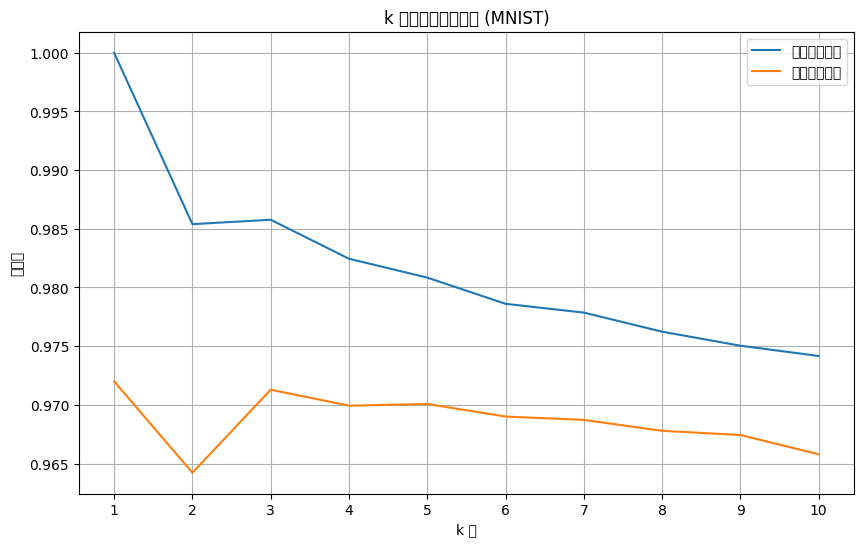

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

# 載入 MNIST 資料集
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# 資料前處理
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 儲存不同 k 值的準確率
train_accuracies = []
test_accuracies = []

# 測試 k=1 到 10
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # 計算訓練集準確率
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # 計算測試集準確率
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# 繪製準確率圖表
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracies, label="訓練集準確率")
plt.plot(range(1, 11), test_accuracies, label="測試集準確率")
plt.xlabel("k 值")
plt.ylabel("準確率")
plt.title("k 近鄰分類器準確率 (MNIST)")
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()